<h2> Normal Distribution and Z Score: Math and statistics for data science</h2>

In [1]:
import pandas as pd
import seaborn as sn

We are going to use heights dataset from kaggle.com. Dataset has heights and weights 
both but I have removed weights to make it simple


https://www.kaggle.com/mustafaali96/weight-height

In [2]:
df = pd.read_csv("heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


**(1) Outlier detection and removal using Standard Deviation**

In [3]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

<Axes: xlabel='height', ylabel='Count'>

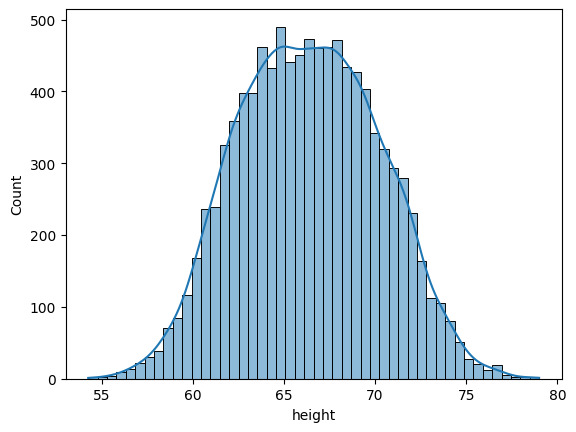

In [7]:
sn.histplot(df.height, kde=True)

In [8]:
mean = df.height.mean()
mean

66.367559754866

In [9]:
std_deviation = df.height.std()
std_deviation

3.847528120795573

In [10]:
mean-3*std_deviation

54.824975392479274

In [11]:
mean+3*std_deviation

77.91014411725271

In [12]:
df[(df.height < 54.82) | (df.height > 77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [13]:
df_no_outlier = df[(df.height<77.91) & (df.height>54.82)]
df_no_outlier.shape

(9993, 2)

**(2) Outlier detection and removal using Z Score**

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score

<img height=200 width=300 src="zscore.png" />

Let's add a new column in our dataframe for this Z score

In [14]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [15]:
df.height.mean()

66.367559754866

In [16]:
df.height.std()

3.847528120795573

In [17]:
(73.84-66.37)/3.84

1.9453124999999998

In [18]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [19]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027
